## Building the Ship

In [15]:
import random

d = int(input("Grid size: "))

grid = [[0 for _ in range(d+2)] for _ in range(d+2)]
    
# Set the first and last rows to 1s
for j in range(d+2):
    grid[0][j] = 2  # First row
    grid[d+1][j] = 2  # Last row

# Set the first and last columns to 1s
for i in range(d+2):
    grid[i][0] = 2 # First column
    grid[i][d+1] = 2 # Last column
    
for r in grid:
    for c in r:
        print(c, end=" ")
    print()

Grid size: 40
2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 
2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 
2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 
2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 
2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 
2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 
2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 
2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 
2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 
2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 
2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 
2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [16]:
def checkNeighbors(grid, r, c, a):
    return [grid[r-1][c],grid[r+1][c],grid[r][c-1],grid[r][c+1]].count(a)

In [17]:

x = random.randint(1, d)
y = random.randint(1, d)


fringe = []
fringe.append((x,y))

deadEnds = []

while len(fringe) > 0:
    curr = random.choice(fringe)
    fringe.remove(curr)
    r, c = curr[0], curr[1]
    if checkNeighbors(grid, r, c, 1) > 1:
        continue
    grid[r][c] = 1
    up = (r-1, c) 
    down = (r+1, c) 
    left = (r, c-1) 
    right = (r, c+1)
    deadEnd = True
    for elt in [up, down, left, right]:
        if grid[elt[0]][elt[1]] == 0:
            numOpenNeighbors = checkNeighbors(grid, elt[0], elt[1], 1)
            if numOpenNeighbors == 1:
                deadEnd = False
                fringe.append(elt)
    if deadEnd:
        deadEnds.append(curr)
        

count = 0   
for row in grid:
    count += row.count(1)

print(f"Percent of cells opened: {100*count/(d*d)}")

Percent of cells opened: 60.75


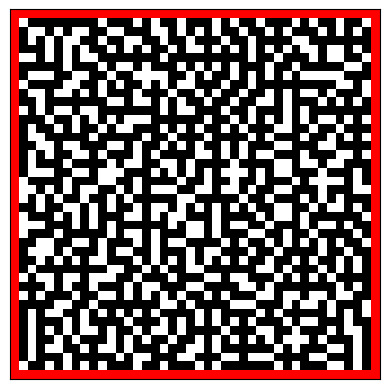

In [18]:
import matplotlib.pyplot as plt
import numpy as np

color_map = {
    0: 'white',
    1: 'black',
    2: 'red'
}

# Create a figure and axis
fig, ax = plt.subplots()

# Create a grid where each cell is colored according to the value in the array
for i in range(len(grid)):
    for j in range(len(grid[i])):
        ax.add_patch(plt.Rectangle((j, i), 1, 1, facecolor=color_map[grid[i][j]]))

# Set grid limits and turn off axis
ax.set_xlim(0, len(grid[0]))
ax.set_ylim(0, len(grid))
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')

plt.gca().invert_yaxis()  # Invert y-axis to make the grid origin (0,0) at the top-left corner
plt.show()

black = open cells, red = wall

In [19]:
for elt in deadEnds:
    if grid[elt[0]][elt[1]] == 2:
        deadEnds.remove(elt)
    numOpenNeighbors = checkNeighbors(grid, elt[0], elt[1], 1)
    if numOpenNeighbors > 1:
        deadEnds.remove(elt)

newList = random.sample(deadEnds, len(deadEnds) // 2)
for elt in newList:
    r = elt[0]
    c = elt[1]
    up = (r-1, c) 
    down = (r+1, c) 
    left = (r, c-1) 
    right = (r, c+1)
    neighbors = [up,down,left,right]
    for pt in neighbors:
        if grid[pt[0]][pt[1]] == 1 or grid[pt[0]][pt[1]] == 2:
            neighbors.remove(pt)
    curr = random.choice(neighbors)
    grid[curr[0]][curr[1]] = 1

count = 0   
for row in grid:
    count += row.count(1)

print(f"Percent of cells opened: {100*count/(d*d)}")

Percent of cells opened: 65.125


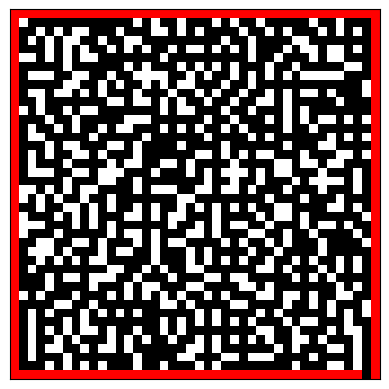

In [20]:
color_map = {
    0: 'white',
    1: 'black',
    2: 'red'
}

# Create a figure and axis
fig, ax = plt.subplots()

# Create a grid where each cell is colored according to the value in the array
for i in range(len(grid)):
    for j in range(len(grid[i])):
        ax.add_patch(plt.Rectangle((j, i), 1, 1, facecolor=color_map[grid[i][j]]))

# Set grid limits and turn off axis
ax.set_xlim(0, len(grid[0]))
ax.set_ylim(0, len(grid))
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')

plt.gca().invert_yaxis()  # Invert y-axis to make the grid origin (0,0) at the top-left corner
plt.show()

## Coding the Fire


In [7]:
def setFire(grid, pt, q):
    if grid[pt[0]][pt[1]] == 3:
        return
    r = pt[0]
    c = pt[1]
    up = (r-1, c) 
    down = (r+1, c) 
    left = (r, c-1) 
    right = (r, c+1)
    neighbors = [up,down,left,right]
    for elt in neighbors:
        k = checkNeighbors(grid, elt[0], elt[1], 3)
        prob = 1 - (1-q)**k
        x = random.random()
        if x <= prob:
            grid[elt[0]][elt[1]] = 3

## Location Initializations

In [13]:
botLoc = (random.randint(1, d), random.randint(1, d))
while grid[botLoc[0]][botLoc[1]] == 0:
    botLoc = (random.randint(1, d), random.randint(1, d))

butLoc = (random.randint(1, d), random.randint(1, d))
while grid[butLoc[0]][butLoc[1]] == 0:
    butLoc = (random.randint(1, d), random.randint(1, d))

fireLoc = (random.randint(1, d), random.randint(1, d))
while grid[fireLoc[0]][fireLoc[1]] == 0:
    fireLoc = (random.randint(1, d), random.randint(1, d))

notDistinct = (botLoc == butLoc) or (botLoc == fireLoc) or (butLoc == fireLoc)
print(distinct)

while notDistinct:
    while grid[botLoc[0]][botLoc[1]] == 0:
        botLoc = (random.randint(1, d), random.randint(1, d))
    while grid[butLoc[0]][butLoc[1]] == 0:
        butLoc = (random.randint(1, d), random.randint(1, d))
    while grid[fireLoc[0]][fireLoc[1]] == 0:
        fireLoc = (random.randint(1, d), random.randint(1, d))

bot1Grid = grid.copy()
bot1Grid[fireLoc[0]][fireLoc[1]] = 3
bot1Grid[botLoc[0]][botLoc[1]] = 4
bot1Grid[butLoc[0]][butLoc[1]] = 4

False


## Shortest Path (Bot 1)

In [14]:
fringe1 = []
fringe1.append(botLoc)
fringe2 = []
fringe2.append(butLoc)

closed_set = {}
prev1 = {}
prev1[botLoc] = None
prev2 = {}
prev2[butLoc] = None

while len(fringe1) > 0:
    curr1 = fringe1.pop(0)
    curr2 = fringe2.pop(0)
    if curr1 == curr2:
        prev = prev2.update(prev1)
        break
    
    if curr1 not in closed_set:
        closed_set.update({curr1: 1})
        r1, c1 = curr1[0], curr1[1]
        neighbors1 = [(r1-1, c1),(r1+1, c1),(r1, c1-1),(r1, c1+1)]
        for elt in neighbors1:
            if bot1Grid[elt[0]][elt[1]] == 1:
                fringe1.append(elt)
                prev1[elt] = curr1
    
    if curr2 not in closed_set:
        closed_set.update({curr2: 1})
        r2, c2 = curr2[0], curr2[1]
        neighbors2 = [(r2-1, c2),(r2+1, c2),(r2, c2-1),(r2, c2+1)]
        for elt in neighbors2:
            if bot1Grid[elt[0]][elt[1]] == 1:
                fringe2.append(elt)
                prev2[elt] = curr2
print(prev)

None


## Game Loop (Bot 1)

In [ ]:
t = 1
fireLocs = []
fireLocs.append(fireLoc)
for i in prev:
    for curr in fireLocs:
        setFire(bot1Grid, curr, 0.5)
        if bot1Grid[curr[0]][curr[1]] == 3:
            fireLocs.pop(fireLocs.index(curr))
            neighbors = [(curr[0]-1,curr[1]), (curr[0]+1,curr[1]), (curr[0], curr[1]-1), (curr[0], curr[1]+1)]
            for elt in neighbors:
                if bot1Grid[elt[0]][elt[1]] == 1:
                    fireLocs.append(elt)
    if bot1Grid[i[0]][i[1]] == 3:
        print(f"Bot1 failed in {t} timesteps.")
        break
    t = t + 1
    bot1Grid[i[0]][i[1]] = 4
print("Success!")

In [ ]:
color_map = {
    0: 'white',
    1: 'black',
    2: 'red',
    3: 'orange',
    4: 'blue'
}

# Create a figure and axis
fig, ax = plt.subplots()

# Create a grid where each cell is colored according to the value in the array
for i in range(len(grid)):
    for j in range(len(grid[i])):
        ax.add_patch(plt.Rectangle((j, i), 1, 1, facecolor=color_map[grid[i][j]]))

# Set grid limits and turn off axis
ax.set_xlim(0, len(grid[0]))
ax.set_ylim(0, len(grid))
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')

plt.gca().invert_yaxis()  # Invert y-axis to make the grid origin (0,0) at the top-left corner
plt.show()